In [93]:
import pandas as pd
import numpy as np
import datetime as dt
import io
from scipy import stats
from sklearn import preprocessing

In [69]:
df = pd.read_excel("/home/cso/Downloads/Assignment- Membership woes.xlsx")

In [70]:
df.shape

(10362, 15)

In [71]:
#df.drop('c', inplace=True, axis=1)

In [72]:
df.head(15)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN
5,A00006,12,110000.0,NaN,NaN,NaN,1.0,TYPE-B,48,3,ANNUAL,5311,INFORCE,20070215,NaN
6,A00007,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,20070221,NaN
7,A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,20070312,20090811.0
8,A00009,35,120000.0,NaN,NaN,NaN,1.0,TYPE-B,35,2,MONTHLY,4522,INFORCE,20070316,NaN
9,A00010,33,102700.0,M,M,14400000.0,1.0,TYPE-B,42,2,SEMI-ANNUAL,11266,INFORCE,20070330,NaN


In [73]:
# df['END_DATE  (YYYYMMDD)'] = pd.to_datetime(df['END_DATE  (YYYYMMDD)'],errors='coerce',unit='d',origin='1970-01-01')
df['END_DATE  (YYYYMMDD)'] = pd.to_datetime(df['END_DATE  (YYYYMMDD)'], format='%Y%m%d.0')
df['START_DATE (YYYYMMDD)'] = pd.to_datetime(df['START_DATE (YYYYMMDD)'], format='%Y%m%d')
# df['START_DATE (YYYYMMDD)'] = pd.to_datetime(df['START_DATE (YYYYMMDD)'],errors='coerce',unit='d',origin='1970-01-01')

In [74]:
df.dtypes

MEMBERSHIP_NUMBER                object
MEMBERSHIP_TERM_YEARS             int64
ANNUAL_FEES                     float64
MEMBER_MARITAL_STATUS            object
MEMBER_GENDER                    object
MEMBER_ANNUAL_INCOME            float64
MEMBER_OCCUPATION_CD            float64
MEMBERSHIP_PACKAGE               object
MEMBER_AGE_AT_ISSUE               int64
ADDITIONAL_MEMBERS                int64
PAYMENT_MODE                     object
AGENT_CODE                       object
MEMBERSHIP_STATUS                object
START_DATE (YYYYMMDD)    datetime64[ns]
END_DATE  (YYYYMMDD)     datetime64[ns]
dtype: object

In [107]:
df.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

MEMBER_ANNUAL_INCOME     1754
period                      0
MEMBERSHIP_STATUS           0
ADDITIONAL_MEMBERS          0
MEMBER_AGE_AT_ISSUE         0
MEMBER_OCCUPATION_CD        0
ANNUAL_FEES                 0
MEMBERSHIP_TERM_YEARS       0
AGENT_CODE                  0
PAYMENT_MODE                0
MEMBERSHIP_PACKAGE          0
MEMBER_GENDER               0
MEMBER_MARITAL_STATUS       0
MEMBERSHIP_NUMBER           0
dtype: int64

In [76]:
df.rename(columns={'END_DATE  (YYYYMMDD)': 'END_DATE(YYYYMMDD)', 'START_DATE (YYYYMMDD)': 'START_DATE(YYYYMMDD)'}, inplace=True)

In [77]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
numerical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='float64' or df.dtypes[x]=='int64' or df.dtypes[x]=='datetime64[ns]']
for col in categorical_columns:
    print ("\nFrequencey of categories for variable %s" %col)
    print (df[col].value_counts())


Frequencey of categories for variable MEMBERSHIP_NUMBER
A03883    1
A00758    1
A08563    1
A02982    1
A01359    1
A08417    1
A08799    1
A05190    1
A07461    1
A04813    1
A03875    1
A01750    1
A09842    1
A01925    1
A09870    1
A07980    1
A00224    1
A06978    1
A07240    1
A04344    1
A06206    1
A09162    1
A01061    1
A10174    1
A02249    1
A03850    1
A10317    1
A01373    1
A04124    1
A07325    1
         ..
A06521    1
A08888    1
A09021    1
A06331    1
A02425    1
A05079    1
A02650    1
A07964    1
A02655    1
A07864    1
A03041    1
A08842    1
A03901    1
A02134    1
A02549    1
A00171    1
A00689    1
A07360    1
A07868    1
A03970    1
A10139    1
A00653    1
A09431    1
A06302    1
A04991    1
A01832    1
A03327    1
A00253    1
A04781    1
A05615    1
Name: MEMBERSHIP_NUMBER, Length: 10362, dtype: int64

Frequencey of categories for variable MEMBER_MARITAL_STATUS
M    6430
S    1144
W     146
D      45
Name: MEMBER_MARITAL_STATUS, dtype: int64

Frequencey of 

In [78]:
df['MEMBERSHIP_STATUS'] = df['MEMBERSHIP_STATUS'].map({'CANCELLED': 1, 'INFORCE': 0})

In [12]:
#now1 = Timestamp(dt.datetime.now())

#now2 = Timestamp(dt.datetime.now())

#(now2 - now1)

In [79]:
now = pd.Timestamp(dt.datetime.now())

df['period'] = (df['END_DATE(YYYYMMDD)'] - df['START_DATE(YYYYMMDD)']).astype('<m8[D]')

df['period'] = np.where(df['period'].isnull(), (now - df['START_DATE(YYYYMMDD)']).astype('<m8[D]'),  (df['END_DATE(YYYYMMDD)'] - df['START_DATE(YYYYMMDD)']).astype('<m8[D]'))

df['period'].head(10)

0    4298.0
1    4249.0
2    4166.0
3    4168.0
4    4159.0
5    4144.0
6    4138.0
7     883.0
8    4115.0
9    4101.0
Name: period, dtype: float64

In [80]:
df.period.isnull().value_counts()

False    10362
Name: period, dtype: int64

In [81]:
numerics = ['int64','float64']
categorical = ['object']
numdf = df.select_dtypes(include=numerics)
catdf = df.select_dtypes(include=categorical)
numdf.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBERSHIP_STATUS,period
0,29,113125.0,25200000.0,1.0,45,2,0,4298.0
1,38,112220.0,10339200.0,1.0,36,3,0,4249.0
2,12,100000.0,14400000.0,1.0,42,1,0,4166.0
3,12,100000.0,9000000.0,1.0,39,2,0,4168.0
4,46,100000.0,4800000.0,1.0,27,2,0,4159.0


In [82]:
df['MEMBER_OCCUPATION_CD'].value_counts()

1.0    7281
2.0    1778
6.0     728
5.0     324
4.0     207
3.0       1
Name: MEMBER_OCCUPATION_CD, dtype: int64

In [83]:
for column in ['MEMBER_GENDER','MEMBER_MARITAL_STATUS']:
    catdf[column].fillna(catdf[column].mode()[0], inplace=True)
for column in ['MEMBER_OCCUPATION_CD']:
    numdf[column].fillna(numdf[column].mode()[0], inplace=True)   

/home/cso/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [84]:
catdf.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)
numdf.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

MEMBER_ANNUAL_INCOME     1754
period                      0
MEMBERSHIP_STATUS           0
ADDITIONAL_MEMBERS          0
MEMBER_AGE_AT_ISSUE         0
MEMBER_OCCUPATION_CD        0
ANNUAL_FEES                 0
MEMBERSHIP_TERM_YEARS       0
dtype: int64

In [173]:
#df['END_DATE(YYYYMMDD)'] = df['END_DATE(YYYYMMDD)'].astype(object)

#numdf['period'].fillna(0, inplace=True)
#df['END_DATE(YYYYMMDD)'].fillna(0, inplace=True)
#astype(str)
#df['END_DATE(YYYYMMDD)'] = df['END_DATE(YYYYMMDD)'].map({'NaN': 0.0})

In [100]:
numdf.fillna(numdf.MEMBER_ANNUAL_INCOME.mean(), inplace=True)

In [101]:
df.head()

,MEMBERSHIP_NUMBER,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBERSHIP_PACKAGE,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBERSHIP_STATUS,period
0,0,1,1,1,0,2778,29,113125.0,25200000.0,1.0,45,2,0,4298.0
1,1,1,1,1,2,2184,38,112220.0,10339200.0,1.0,36,3,0,4249.0
2,2,1,1,1,0,3728,12,100000.0,14400000.0,1.0,42,1,0,4166.0
3,3,1,1,1,0,1991,12,100000.0,9000000.0,1.0,39,2,0,4168.0
4,4,1,1,1,2,3453,46,100000.0,4800000.0,1.0,27,2,0,4159.0


In [65]:
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline

# plt.boxplot(df["MEMBER_ANNUAL_INCOME"])

In [102]:
numdf.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBERSHIP_STATUS,period
0,29,113125.0,25200000.0,1.0,45,2,0,4298.0
1,38,112220.0,10339200.0,1.0,36,3,0,4249.0
2,12,100000.0,14400000.0,1.0,42,1,0,4166.0
3,12,100000.0,9000000.0,1.0,39,2,0,4168.0
4,46,100000.0,4800000.0,1.0,27,2,0,4159.0


In [103]:
from sklearn import preprocessing
for column in catdf.columns:
    le = preprocessing.LabelEncoder()
    catdf[column] = le.fit_transform(catdf[column].astype(str))

In [132]:
data = pd.concat([catdf, numdf], axis=1)
data.head()

,MEMBERSHIP_NUMBER,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBERSHIP_PACKAGE,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBERSHIP_STATUS,period
0,0,1,1,1,0,1977,29,113125.0,25200000.0,1.0,45,2,0,4298.0
1,1,1,1,1,2,1318,38,112220.0,10339200.0,1.0,36,3,0,4249.0
2,1474,1,1,1,0,3033,12,100000.0,14400000.0,1.0,42,1,0,4166.0
3,2585,1,1,1,0,1103,12,100000.0,9000000.0,1.0,39,2,0,4168.0
4,3696,1,1,1,2,2728,46,100000.0,4800000.0,1.0,27,2,0,4159.0


In [133]:
msk = np.random.rand(len(data)) < 0.7

train = data[msk]

test = data[~msk]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe94ea7be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efe94b17198>]], dtype=object)

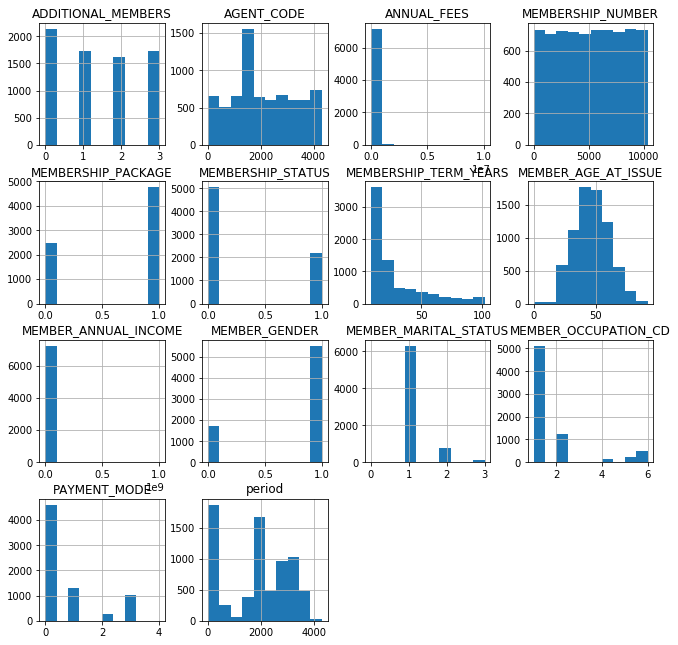

In [116]:
import matplotlib.pyplot as plt
train_scale[train_scale.dtypes[(train_scale.dtypes=="float64")|(train_scale.dtypes=="int64")].index.values].hist(figsize=[11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe956dad68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efe951eba90>]], dtype=object)

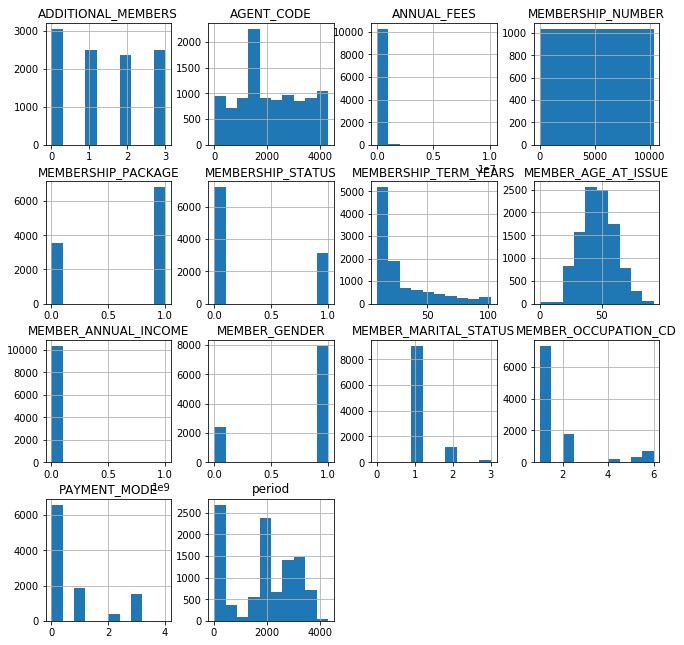

In [111]:
import matplotlib.pyplot as plt
data[data.dtypes[(train.dtypes=="float64")|(data.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [113]:
df2 = data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df2)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.333333,1.0,1.0,0.0,0.458063,0.215054,0.011200,0.025190,0.0,0.489130,0.666667,0.0,1.000000
1,0.000097,0.333333,1.0,1.0,0.5,0.305375,0.311828,0.011111,0.010329,0.0,0.391304,1.000000,0.0,0.988570
2,0.142264,0.333333,1.0,1.0,0.0,0.702734,0.032258,0.009901,0.014390,0.0,0.456522,0.333333,0.0,0.969209
3,0.249493,0.333333,1.0,1.0,0.0,0.255561,0.032258,0.009901,0.008990,0.0,0.423913,0.666667,0.0,0.969676
4,0.356722,0.333333,1.0,1.0,0.5,0.632067,0.397849,0.009901,0.004790,0.0,0.293478,0.666667,0.0,0.967576


In [114]:
msk = np.random.rand(len(df2)) < 0.7

train_scale = data[msk]

test_scale = data[~msk]

In [124]:
from sklearn.preprocessing import scale
X_train_scale=scale(train)
X_test_scale=scale(test)

In [119]:
print (len(X_train_scale))
print (len(X_test_scale))
print (len(data))

7141
3221
10362


In [51]:
train.columns.values
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

In [52]:
#!pip install pandas_ml
# y_train.head(2)

NameError: name 'y_train' is not defined

In [203]:
# For XGBoost

#!pip install networkx==1.11

#!pip install hyperopt
import networkx as n 
print(n.__version__)



1.11


In [ ]:
# train.columns.values
# y_train = train.MEMBERSHIP_STATUS
# y_test = test.MEMBERSHIP_STATUS
# del train["MEMBERSHIP_STATUS"]
# del test["MEMBERSHIP_STATUS"]

col_train = ['MEMBERSHIP_NUMBER', 'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER',
       'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'AGENT_CODE',
       'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS','period']

import pandas as pd, numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

def objective(space):

    clf = xgb.XGBClassifier(n_estimators = 10000,
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'])

    eval_set  = [( train, y_train), ( test, y_test)]

    clf.fit(train[col_train], y_train,eval_set=eval_set, eval_metric="auc",early_stopping_rounds=30)
    
    pred = clf.predict_proba(test)[:,1]
    print (pred.round())
    accuracy = accuracy_score(y_test, pred.round(), normalize=True)
    xgb.plot_importance(clf)
    #accuracy = metrics.accuracy_score(y_test, pred)
    print (("Accuracy : %s" % "{0:.3%}").format(accuracy))
    auc = roc_auc_score(y_test, pred)
    print ("SCORE:", auc)

    return{'loss':1-auc, 'status': STATUS_OK }


space ={
        #'max_depth': hp.quniform("x_max_depth", 5, 30, 1),
        'max_depth': hp.choice('x_max_depth', np.arange(5, 30, dtype=int)),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

# y = data.pop('MEMBERSHIP_STATUS')
# X = dataprint (best)

In [222]:
#print ("SCORE:", auc)
xgb.plot_importance(clf)

NameError: name 'clf' is not defined

In [125]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline
from sklearn.metrics import cohen_kappa_score



#Generic function for making a classification model and accessing performance:
target = 'MEMBERSHIP_STATUS'
IDcol = ['MEMBERSHIP_NUMBER']

def classification_model(model,dtrain,dtest,predictors,target,IDcol,filename):
  #Fit the model:
  model.fit(dtrain[predictors],dtrain[target])
  
  #Make predictions on training set:
  predictions = model.predict(dtrain[predictors])
  cm = ConfusionMatrix(dtrain[target], predictions)
  print (cm.classification_report)
  print ("\n")
  print ("Confusion matrix:\n%s" % cm)
  print ("\n")
  print (cm.print_stats())
  print ("\n")
#   cm.plot()
#   plt.show()
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,dtrain[target])
  print (("Accuracy : %s" % "{0:.3%}").format(accuracy))
  fpr, tpr, threshold = metrics.roc_curve(dtrain[target], predictions)
  roc_auc = metrics.auc(fpr, tpr)
  print ("AUC: ",roc_auc)

#   plt.plot(fpr,tpr)
#   plt.show() 
#   # This is the AUC

  auc = np.trapz(tpr,fpr)
  print ("auc: ", auc)
  k = cohen_kappa_score(dtrain[target], predictions)
  print ("cohen_kappa_score: ", k)
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(dtrain.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (dtrain[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = dtrain[target].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(dtrain[predictors].iloc[test,:], dtrain[target].iloc[test]))
 
  print (("Cross-Validation Score : %s" % "{0:.3%}").format(np.mean(error)))
  
  df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
  g = ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
  print (g)
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(dtrain[predictors],dtrain[target])  
    
  print ("============Test==============")  
  #Predict on testing data:
  #dtest[target] = model.predict(dtest[predictors])
  pred = model.predict(dtest[predictors])
  cm2 = ConfusionMatrix(dtest[target], pred)
  print (cm2.classification_report)
  print ("\n")
  print ("Confusion matrix:\n%s" % cm2)
  print ("\n")
  print (cm2.print_stats())
  print ("\n")
  accuracy = metrics.accuracy_score(pred,dtest[target])
  print (("Accuracy : %s" % "{0:.3%}").format(accuracy))
  fpr, tpr, threshold = metrics.roc_curve(dtest[target], pred)
  roc_auc = metrics.auc(fpr, tpr)
  print ("AUC: ",roc_auc)

#   plt.plot(fpr,tpr)
#   plt.show() 
#   # This is the AUC

  auc = np.trapz(tpr,fpr)
  print ("auc: ", auc)
  k = cohen_kappa_score(dtest[target], pred)
  print ("cohen_kappa_score: ", k)
  #Accuracy = TP+TN/TP+FP+FN+TN

  #predicted= model.predict(y_test) 
  #Export submission file:
#   IDcol.append(target)
#   submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
#   submission['MEMBERSHIP_STATUS'] = submission['MEMBERSHIP_STATUS'].map({0:'N', 1:'Y'})
#   submission.to_csv(filename, index=False)


In [40]:
# !pip install scikit-plot

#!pip install ggplot

                precision    recall  F1_score support
Classes                                              
0.0              0.587435  0.806726  0.679834    2944
1.0              0.373348  0.168909   0.23259    2007
__avg / total__   0.50065  0.548172  0.498534    4951


Confusion matrix:
Predicted   0.0  1.0  __all__
Actual                       
0.0        2375  569     2944
1.0        1668  339     2007
__all__    4043  908     4951


population: 4951
P: 2007
N: 2944
PositiveTest: 908
NegativeTest: 4043
TP: 339
TN: 2375
FP: 569
FN: 1668
TPR: 0.168908819133
TNR: 0.806725543478
PPV: 0.373348017621
NPV: 0.587435072966
FPR: 0.193274456522
FDR: 0.626651982379
FNR: 0.831091180867
ACC: 0.548172086447
F1_score: 0.232590051458
MCC: -0.0309118908233
informedness: -0.0243656373887
markedness: -0.0392169094132
prevalence: 0.405372651989
LRP: 0.873932449082
LRN: 1.03020313115
DOR: 0.848310806539
FOR: 0.412564927034
None


Accuracy : 86.642%
AUC:  0.787743017461
auc:  0.787743017461
cohen_kappa_s

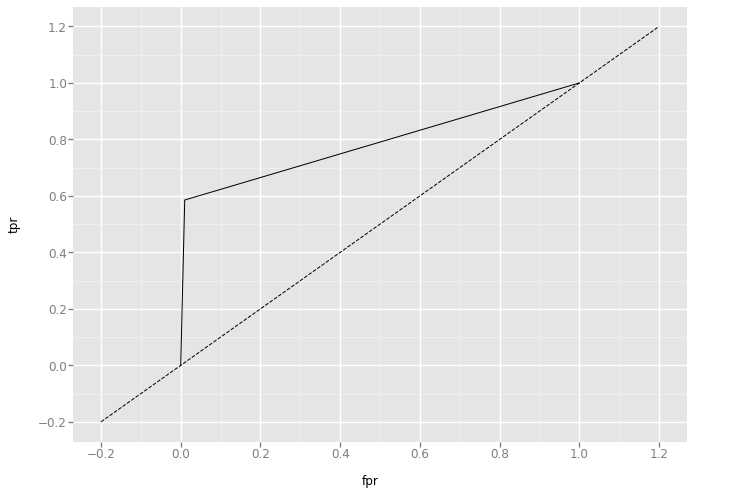

<ggplot: (8726995348614)>
============Test==============
                precision    recall  F1_score support
Classes                                              
0.0              0.674641  0.815029   0.73822     692
1.0              0.322751  0.183183  0.233716     333
__avg / total__   0.56032  0.609756  0.574318    1025


Confusion matrix:
Predicted  0.0  1.0  __all__
Actual                      
0.0        564  128      692
1.0        272   61      333
__all__    836  189     1025


population: 1025
P: 333
N: 692
PositiveTest: 189
NegativeTest: 836
TP: 61
TN: 564
FP: 128
FN: 272
TPR: 0.183183183183
TNR: 0.815028901734
PPV: 0.322751322751
NPV: 0.674641148325
FPR: 0.184971098266
FDR: 0.677248677249
FNR: 0.816816816817
ACC: 0.609756097561
F1_score: 0.233716475096
MCC: -0.00215917583596
informedness: -0.00178791508271
markedness: -0.00260752892332
prevalence: 0.32487804878
LRP: 0.990334084084
LRN: 1.00219368304
DOR: 0.988166360294
FOR: 0.325358851675
None


Accuracy : 85.679%
AUC:  0

In [54]:
model1 = LogisticRegression()
predictor_var = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER',
       'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE',
       'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS','period']
classification_model(model1,train_scale,test_scale,predictor_var,target,IDcol,'logistic.csv')

                precision    recall  F1_score support
Classes                                              
0.0              0.592522  0.825376  0.689828    2995
1.0               0.38687  0.162562  0.228928    2030
__avg / total__  0.509442  0.557612  0.503634    5025


Confusion matrix:
Predicted   0.0  1.0  __all__
Actual                       
0.0        2472  523     2995
1.0        1700  330     2030
__all__    4172  853     5025


population: 5025
P: 2030
N: 2995
PositiveTest: 853
NegativeTest: 4172
TP: 330
TN: 2472
FP: 523
FN: 1700
TPR: 0.162561576355
TNR: 0.825375626043
PPV: 0.386869871043
NPV: 0.592521572387
FPR: 0.174624373957
FDR: 0.613130128957
FNR: 0.837438423645
ACC: 0.557611940299
F1_score: 0.228928199792
MCC: -0.015766954264
informedness: -0.0120627976019
markedness: -0.0206085565693
prevalence: 0.403980099502
LRP: 0.930921455415
LRN: 1.01461491862
DOR: 0.917512090878
FOR: 0.407478427613
None


Accuracy : 85.293%
AUC:  0.763734806974
auc:  0.763734806974
cohen_kappa_sc

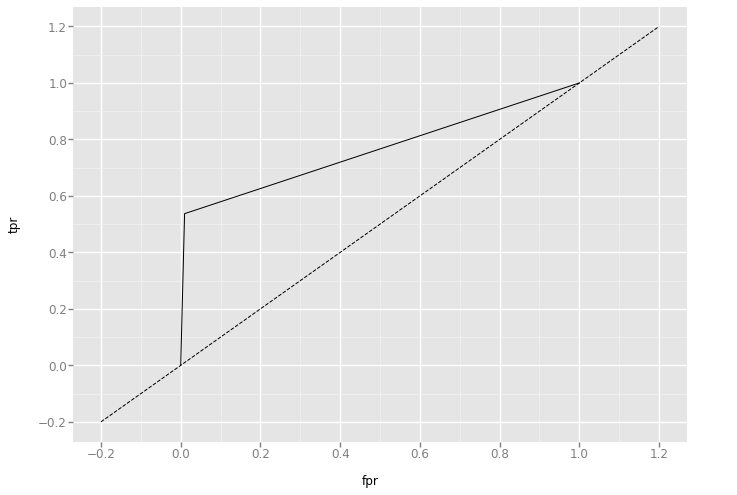

<ggplot: (-9223363309862389465)>
============Test==============
                precision    recall  F1_score support
Classes                                              
0.0              0.667906  0.826687  0.738862     652
1.0              0.280255  0.141026  0.187633     312
__avg / total__  0.542442  0.604772  0.560456     964


Confusion matrix:
Predicted  0.0  1.0  __all__
Actual                      
0.0        539  113      652
1.0        268   44      312
__all__    807  157      964


population: 964
P: 312
N: 652
PositiveTest: 157
NegativeTest: 807
TP: 44
TN: 539
FP: 113
FN: 268
TPR: 0.141025641026
TNR: 0.826687116564
PPV: 0.28025477707
NPV: 0.66790582404
FPR: 0.173312883436
FDR: 0.71974522293
FNR: 0.858974358974
ACC: 0.604771784232
F1_score: 0.18763326226
MCC: -0.0409115049632
informedness: -0.0322872424099
markedness: -0.0518393988903
prevalence: 0.323651452282
LRP: 0.813705468573
LRN: 1.03905618191
DOR: 0.783119799234
FOR: 0.33209417596
None


Accuracy : 84.493%
AUC:  0.

In [136]:
model2 = LogisticRegression(penalty='l2',C=.01)
predictor_var = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER',
       'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE',
       'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS','period']
classification_model(model1,train_scale,test_scale,predictor_var,target,IDcol,'logistic.csv')

In [137]:
# Standardizing the features
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,y_train)
# Checking the models accuracy
accuracy_score(test_scale,log.predict(test_scale))

/home/cso/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[-0.5204287   0.30211517 -0.63745866 ...,  0.40480812 -1.62737871
  1.27169668].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

                precision    recall  F1_score support
Classes                                              
0.0              0.578604  0.680801  0.625556    2995
1.0              0.363091  0.268473  0.308694    2030
__avg / total__  0.491541  0.514229   0.49755    5025


Confusion matrix:
Predicted   0.0   1.0  __all__
Actual                        
0.0        2039   956     2995
1.0        1485   545     2030
__all__    3524  1501     5025


population: 5025
P: 2030
N: 2995
PositiveTest: 1501
NegativeTest: 3524
TP: 545
TN: 2039
FP: 956
FN: 1485
TPR: 0.268472906404
TNR: 0.680801335559
PPV: 0.363091272485
NPV: 0.578603859251
FPR: 0.319198664441
FDR: 0.636908727515
FNR: 0.731527093596
ACC: 0.514228855721
F1_score: 0.308694420844
MCC: -0.0543834408615
informedness: -0.0507257580368
markedness: -0.0583048682641
prevalence: 0.403980099502
LRP: 0.841084053012
LRN: 1.07450889913
DOR: 0.782761365397
FOR: 0.421396140749
None


Accuracy : 100.000%
AUC:  1.0
auc:  1.0
cohen_kappa_score:  1.0
Cros

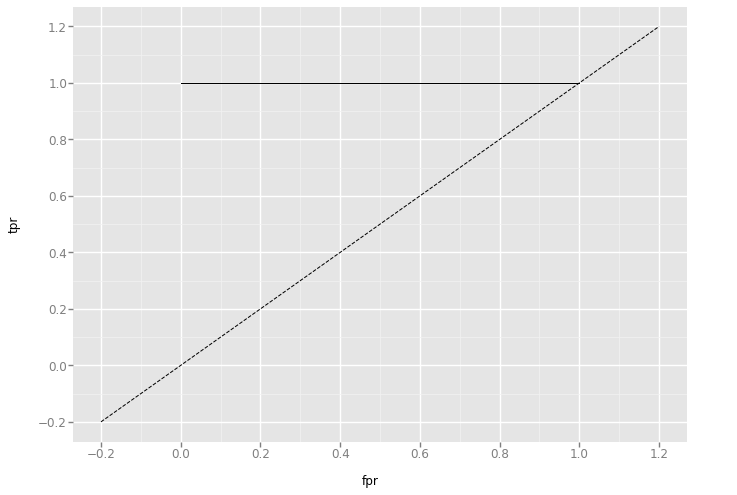

<ggplot: (-9223363309861806357)>
============Test==============
                precision    recall  F1_score support
Classes                                              
0.0              0.654412  0.682515  0.668168     652
1.0              0.271127  0.246795  0.258389     312
__avg / total__  0.530361  0.541494  0.535543     964


Confusion matrix:
Predicted  0.0  1.0  __all__
Actual                      
0.0        445  207      652
1.0        235   77      312
__all__    680  284      964


population: 964
P: 312
N: 652
PositiveTest: 284
NegativeTest: 680
TP: 77
TN: 445
FP: 207
FN: 235
TPR: 0.246794871795
TNR: 0.682515337423
PPV: 0.271126760563
NPV: 0.654411764706
FPR: 0.317484662577
FDR: 0.728873239437
FNR: 0.753205128205
ACC: 0.541493775934
F1_score: 0.258389261745
MCC: -0.0725511272829
informedness: -0.0706897907818
markedness: -0.0744614747307
prevalence: 0.323651452282
LRP: 0.777344233866
LRN: 1.10357245751
DOR: 0.704388940282
FOR: 0.345588235294
None


Accuracy : 100.000%
AU

In [115]:
rf1 = RandomForestClassifier(n_estimators=100,class_weight="balanced")
predictor_var = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER',
       'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE',
       'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS','period']
classification_model(rf1,train_scale,test_scale,predictor_var,target,IDcol,'rf1.csv')

                precision    recall  F1_score support
Classes                                              
0.0              0.570195  0.666775  0.614715    3070
1.0                0.3513  0.264187  0.301579    2097
__avg / total__  0.481358  0.503387   0.48763    5167


Confusion matrix:
Predicted   0.0   1.0  __all__
Actual                        
0.0        2047  1023     3070
1.0        1543   554     2097
__all__    3590  1577     5167


population: 5167
P: 2097
N: 3070
PositiveTest: 1577
NegativeTest: 3590
TP: 554
TN: 2047
FP: 1023
FN: 1543
TPR: 0.264186933715
TNR: 0.6667752443
PPV: 0.351299936588
NPV: 0.570194986072
FPR: 0.3332247557
FDR: 0.648700063412
FNR: 0.735813066285
ACC: 0.503386878266
F1_score: 0.30157866086
MCC: -0.0736194237569
informedness: -0.0690378219855
markedness: -0.0785050773391
prevalence: 0.405844784207
LRP: 0.792819048392
LRN: 1.10353986981
DOR: 0.718432627658
FOR: 0.429805013928
None


Accuracy : 100.000%
AUC:  1.0
auc:  1.0
cohen_kappa_score:  1.0
Cross-Va

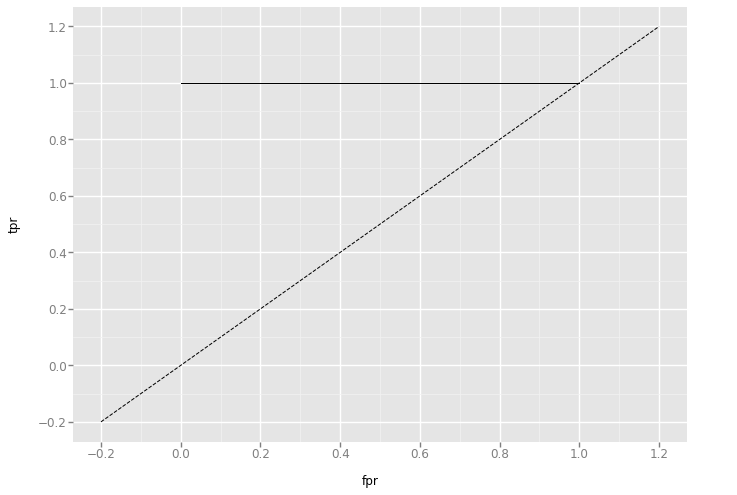

<ggplot: (-9223363281254417320)>


In [398]:
rf2 = RandomForestClassifier(n_estimators=1000)
predictor_var = ['MEMBERSHIP_PACKAGE','MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'period']
classification_model(rf2,train,test,predictor_var,target,IDcol,'rf1.csv')

MEMBER_AGE_AT_ISSUE      0.238098
MEMBER_ANNUAL_INCOME     0.215095
ANNUAL_FEES              0.176622
MEMBERSHIP_TERM_YEARS    0.146255
ADDITIONAL_MEMBERS       0.065478
PAYMENT_MODE             0.046455
MEMBERSHIP_PACKAGE       0.036576
MEMBER_OCCUPATION_CD     0.034779
MEMBER_GENDER            0.025273
MEMBER_MARITAL_STATUS    0.015370
dtype: float64


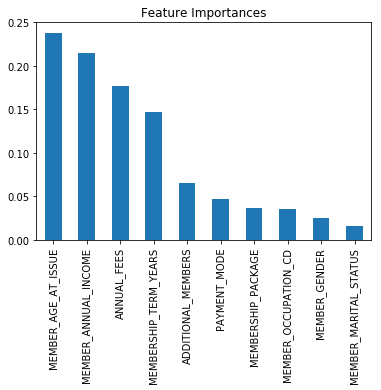

In [34]:
featimp = pd.Series(rf1.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', title='Feature Importances')

In [129]:
from sklearn.cross_validation import train_test_split


y = data.pop('MEMBERSHIP_STATUS')
X = data

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
X.iloc[X_test].head() # return dataframe train

,MEMBERSHIP_NUMBER,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBERSHIP_PACKAGE,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,period
5593,5467,1,1,0,3,3754,52,1181534.26,5.000004e+06,1.0,53,2,943.0
10067,78,3,1,0,0,1568,22,103090.17,1.451100e+06,6.0,65,0,1703.0
4645,4414,1,0,1,0,3097,28,300000.00,3.300000e+06,1.0,66,3,2851.0
1870,1331,1,1,1,0,1596,53,400000.00,5.000004e+06,1.0,29,3,3265.0
2794,2357,1,1,1,0,3339,27,375000.00,1.451100e+06,1.0,13,0,3065.0


In [150]:
# y = data.pop('MEMBERSHIP_STATUS')
# X = data
import pandas as pd, numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, min_samples_leaf = 50) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
#     'min_samples_leaf': [1,5,10,50,100,200,500]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print (CV_rfc.best_params_)


/home/cso/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_features': 'auto', 'n_estimators': 700}


In [ ]:
predictions = CV_rfc.predict(y)
cm = ConfusionMatrix(dtrain[target], predictions)
cm.print_stats()
#Print accuracy
accuracy = metrics.accuracy_score(predictions,dtrain[target])
print "Accuracy : %s" % "{0:.3%}".format(accuracy)

In [ ]:
rfc2 = RandomForestClassifier(n_jobs=-1,max_features= 'log2' ,n_estimators=200, oob_score = True, min_samples_leaf = 50) 

==========================    END  ========================================

.








.

In [ ]:
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = float(params['learning_rate'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    params['min_child_weight'] = float(params['min_child_weight'])
    params['objective'] = 'multi:softprob'
    params['eval_metric'] = 'merror'
    params['booster'] = 'gbtree'
    params['num_class'] = 5
    params['silent'] = 1
    params['nthread'] = 10
    params['seed'] = 2017
    
    global X, y, best
    
    RANDOM_STATE = 2
    n_folds = 18
    scores = []
    
    kf = StratifiedKFold(n_folds, random_state=RANDOM_STATE, shuffle = True)
    print('..........................')
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]    
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        X_val2 = xgb.DMatrix(X_val, label=y_val)
        watchlist = [(xgtrain, 'train'), (X_val2, 'eval')]
        model = xgb.train(params, xgtrain, 60000, watchlist, early_stopping_rounds=100, verbose_eval=False) 
        
        lg = model.predict(X_val2, ntree_limit=model.best_ntree_limit) 
        res = [np.argmax(lg[i]) for i in range(lg.shape[0])]
        scores.append(accuracy_score(y_val, res))
        print('Xgboost', scores[-1])
    
    score = np.mean(scores)
    
    print("############### Score: {0}".format(score))
    print("############### Prms: ", params)
    print('..........................')
    
    return {
        'loss': 1-score,
        'status': STATUS_OK,
        'eval_time': time.time(),
        }
xgb_space = {
        'learning_rate': hp.quniform('eta', 0.005, 0.05, 0.005),
        'max_depth': hp.quniform('max_depth', 3, 14, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.01),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.4, 1, 0.05),
        
}
                                  
trials = Trials()
best = fmin(objective,
    space=xgb_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)


In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

estimators = []
results = np.zeros(len(X))
score = 0.0
for train_index, test_index in folds:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += f1_score(y_test, results[test_index])
score /= numFolds